In [1]:
import numpy as np
import matplotlib.pyplot as plt

from spring_rods_system_setup import SpringRodsSystemSetup
from spring_rods_system_solver import SpringRodsSystemSolver

In [2]:
plt.rcParams.update({
    'axes.grid': True,
    'figure.facecolor': 'white'
})

In [3]:
model = SpringRodsSystemSetup(
    interval=(-1, 1),
    spring_len=1,
    nodes_num=10,
    material_const=(1, 1),
    spring_const=(1, 1),
    body_forces=lambda x: np.where(x < 0, 1, 0)
)

In [4]:
solver = SpringRodsSystemSolver(model)

In [5]:
positions = np.concatenate((model.domain[0], model.domain[1]))

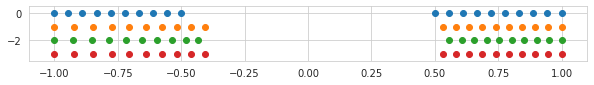

In [6]:
sprint_const = [(1, 1), (10, 1), (1, 10)]

fig = plt.gcf()
fig.set_size_inches(10, 1)
plt.ylim(-len(sprint_const) - 0.5, 0.5)

plt.scatter(x=positions, y=np.zeros(2 * model.nodes_num))

for idx, const in enumerate(sprint_const, 1):
    model.set_spring_const(const)
    displacements = solver()
    plt.scatter(x=positions + displacements, y=np.full(2 * model.nodes_num, fill_value=-idx))

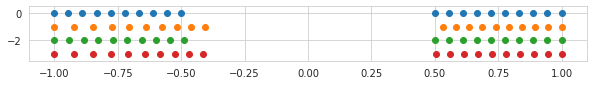

In [7]:
material_const = [(1, 1), (10, 1), (1, 10)]

fig = plt.gcf()
fig.set_size_inches(10, 1)
plt.ylim(-len(sprint_const) - 0.5, 0.5)

plt.scatter(x=positions, y=np.zeros(2 * model.nodes_num))

for idx, const in enumerate(material_const, 1):
    model.set_material_const(const)
    result = solver()
    displacements = result
    plt.scatter(x=positions + displacements, y=np.full(2 * model.nodes_num, fill_value=-idx))